# How to Use Poisson Distribution like You Know What You Are Doing
## Thankfully, there is Poisson distribution for these cases
<img src='images/jessica.jpg'></img>
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@thepaintedsquare?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Bruno Bueno</a>
        on 
        <a href='https://www.pexels.com/photo/little-kid-wearing-virtual-reality-headset-while-playing-at-home-3405458/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels</a>
    </strong>
</figcaption>

### Setup

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

### The Story

You have been freelancing for 10 years now. So far, your average annual income was about 80,000$. This year, you feel like you are stuck in a rut and decide to hit 6 figures. To do that, you want to start by calculating the probability of this exciting achievement happening but you don't know how to do so. 

Turns out, you are not alone. In the world, there are many scenarios where there is a known rate of some random event and businessmen want to find the chance of the event happening more or less than this rate in the future. For example, retailer owners who already know their average sales would try to guess how much more they would make on special days such as on Black Fridays or Cyber Mondays. This would help them to store more products and manage their staff accordingly. 

In 1830, French statistician Siméon-Denis Poisson developed the famous **Poisson Probability Distribution**. This distribution and its related function has endless implications in science ranging from finding the probability of a large meteorite hitting the Earth to detecting mutation in biology. 

In this post, we will talk about the intuition behind the Poission distribution, how to understand and use its formula, and how to simulate it using Python code.

### Discrete Probability Distributions

> This post assumes you have a basic understanding of probability. If not, please check out this [great](https://towardsdatascience.com/probability-concepts-explained-introduction-a7c0316de465) article.

Before we get to the real meat of the article, we will build some understanding of discrete probability distributions. 

First, let's define what we mean by discrete. In descriptive statistics, discrete data is any data that is recorded or collected by counting, i. e. integers. Examples are test scores, number of cars in a parking lot, number of childbirths in a hospital, etc. 

Then, there are random experiments that have discrete outcomes. For example, a coin flip has two outcomes: heads and tails (1 and 0), rolling a die has 6 discrete outcomes and so on. If a random variable *X* is used to store all possible outcomes of a discrete experiment, it will have a discrete probability distribution. 

> Probability distribution records all possible outcomes of a random experiment.

As a trivial example, let's build the distribution of a single coin flip:

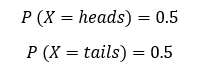

That was easy. If we want to record the distribution programmatically, it would be in the form of a Python list or Numpy array:

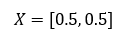

However, you can imagine that for large experiments that have many possible outcomes, building the distribution and finding the probabilities in this way becomes impossible. Thankfully, every probability distribution ever invented comes with their own formula to calculate any outcome's probability of a given experiment. For discrete probability distributions, these functions are called Probability Mass Functions (PMF). For a more detailed explanation, read my [previous post](https://towardsdatascience.com/how-to-think-probabilistically-with-discrete-distributions-ea28e2bcafdc) on discrete distributions.

We will talk more about PMFs later in the post.

### Poisson Distribution

We will start understanding the Poisson distribution using a case study. Say you are a manager of a large call center. The center receives 200 calls an hour. In the past, the center did note receive any calls during lunchtime but now you decide to offer better customer satisfaction, you want to create lunch shifts among your staff. You know that there are not many calls during that time compared to other times of the day so you are hesitating about the number of employees in each shift. 